## 16.여러 그래프


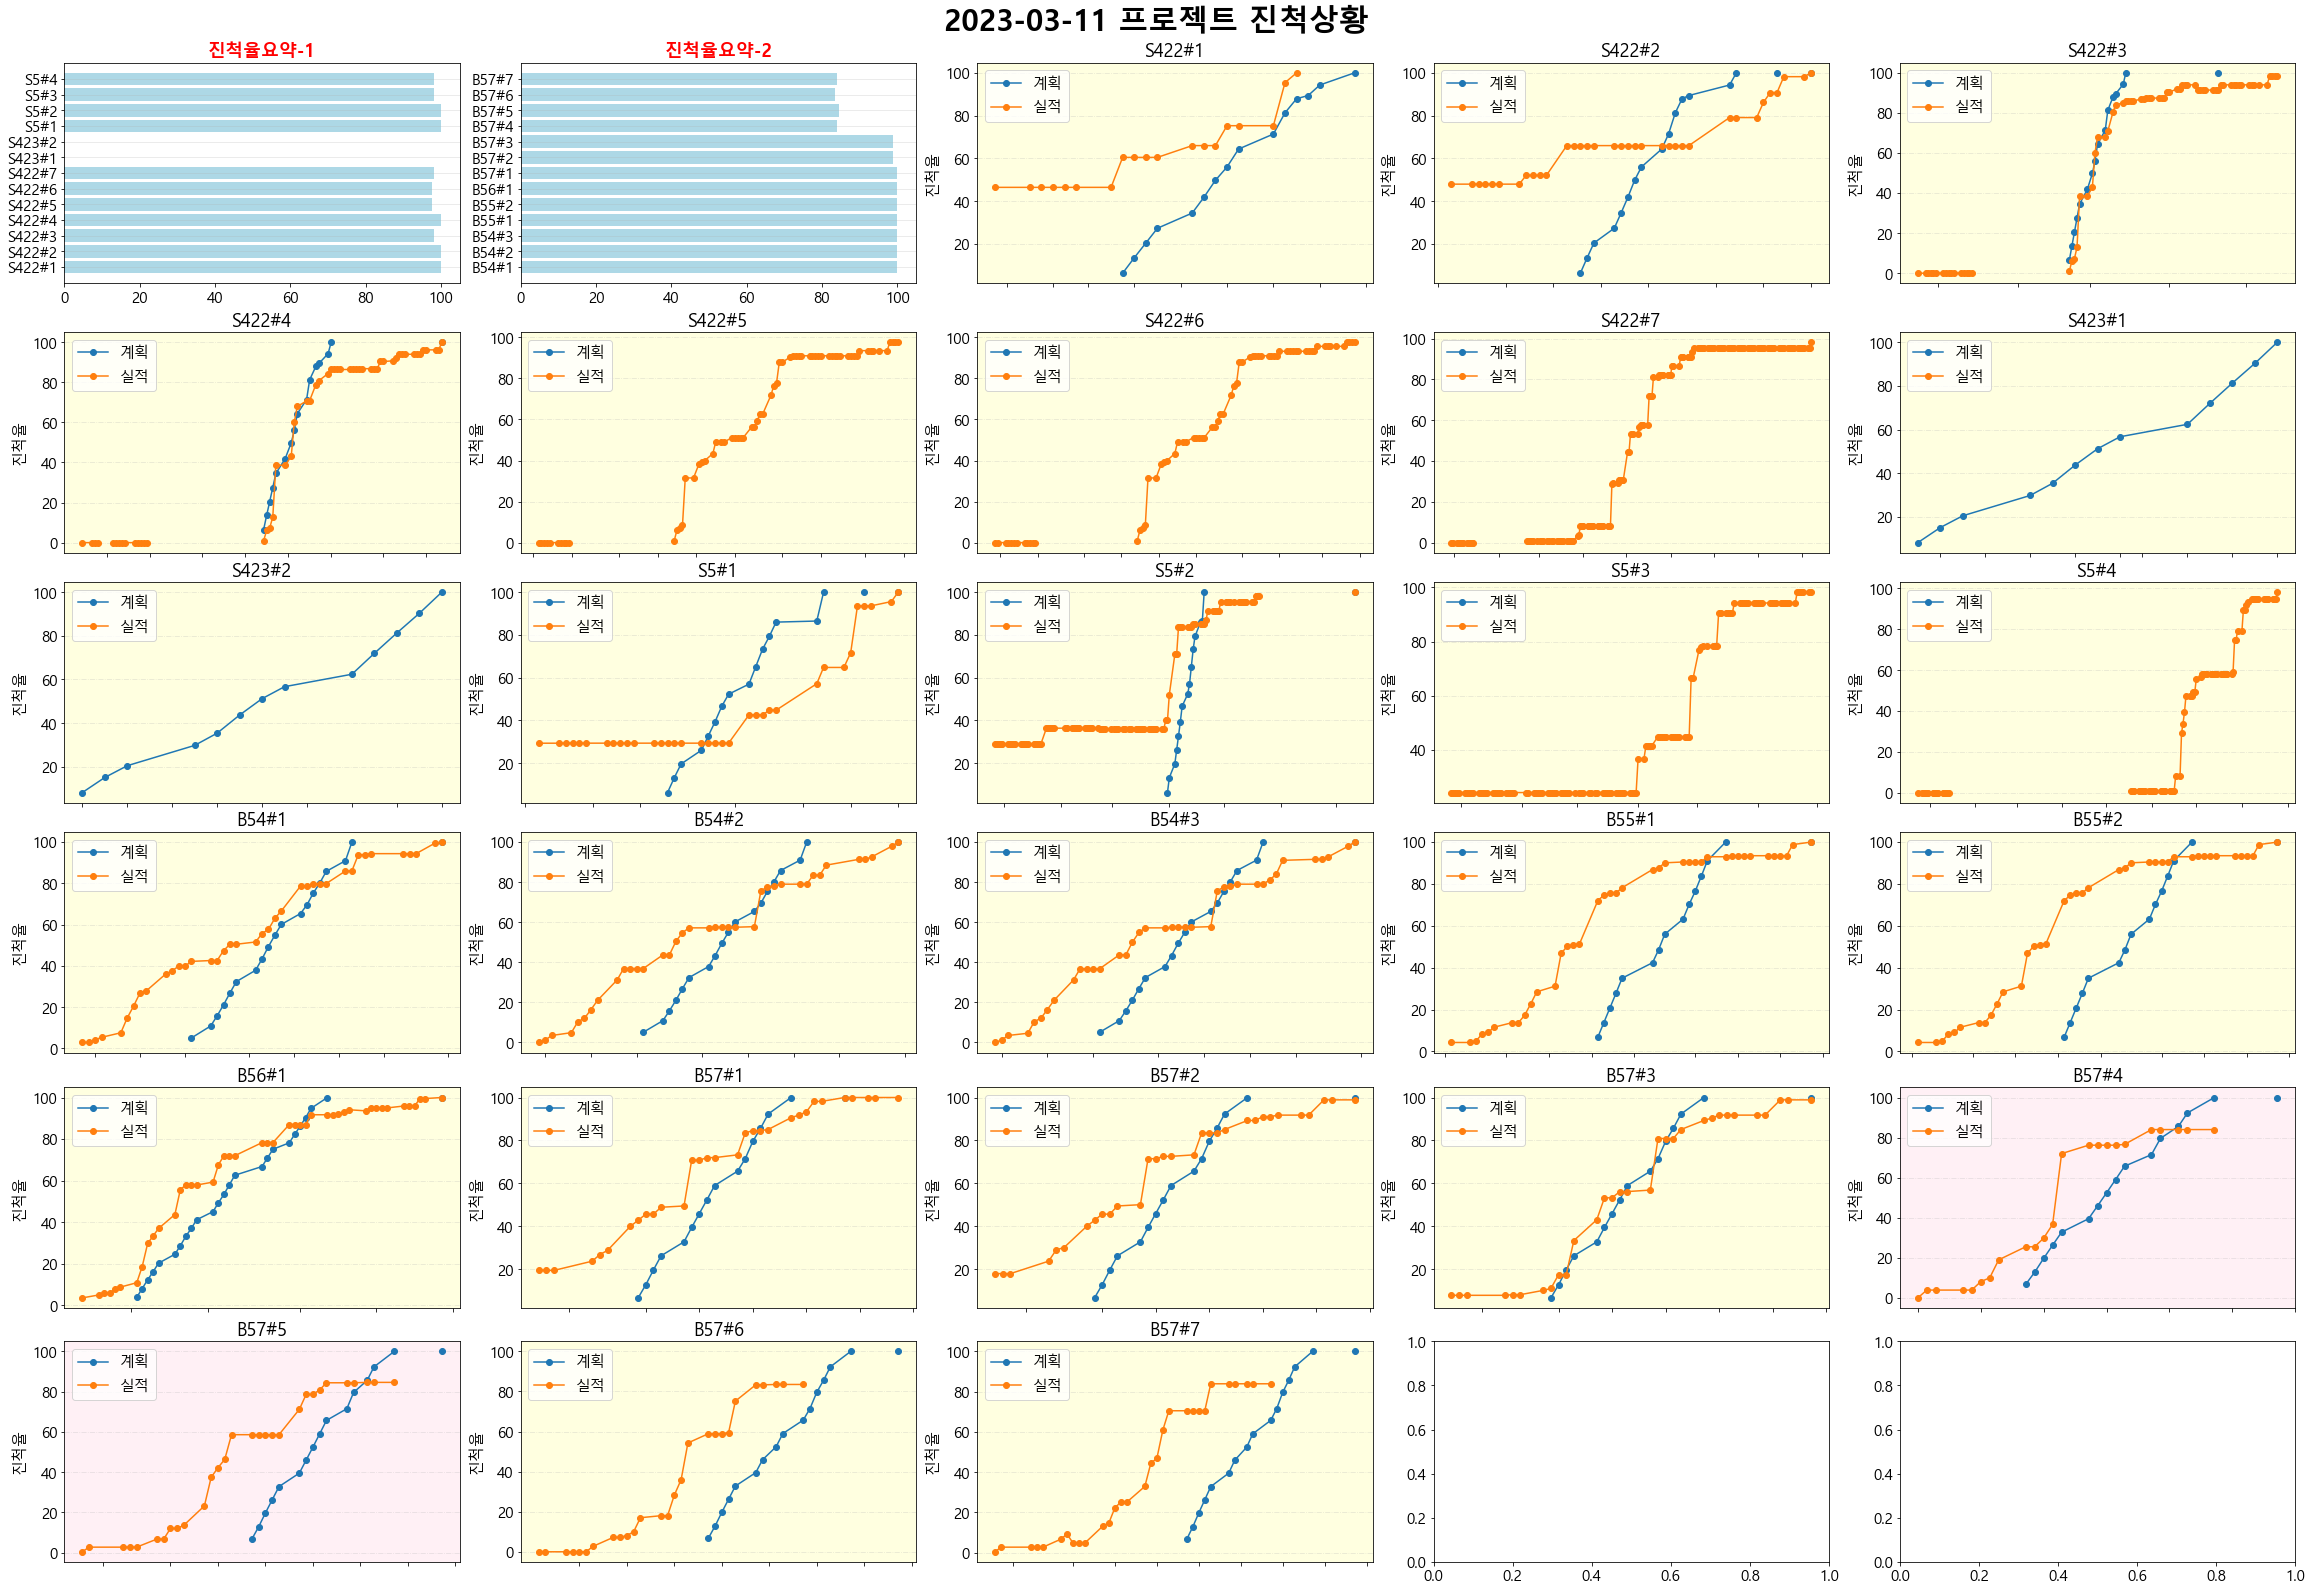

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from datetime import date, timedelta
import os


# os 모듈에서 isfile 파일존재 확인 - 재귀함수를 사용하여 파일이 존재하면 파일명을 다르게 한다
def circulation(filename):
    if os.path.isfile('../_matplotlib_예제/'+ filename):
        filename = filename + '.png'
        circulation(filename)
    else:
        plt.savefig(filename)  ### 그림으로 저장하기


try : 
    
    matplotlib.rcParams['font.family'] = 'Malgun Gothic' #  윈도우 맑은 고딕
    # matplotlib.rcParams['font.family'] = 'AppleGothic'  #  for Mac
    matplotlib.rcParams['font.size'] = 15 
    matplotlib.rcParams['axes.unicode_minus'] = False # 한글폰트 사용시 -가 깨지는 현상 방지

    df = pd.read_excel('../_openpyxl_예제/VAD진척율일람.xlsx')  ## openpyxl 프로그램으로 생성한 matplotlib를 이용하기 위한 xlsx 파일

    today = str(date.today())
    filename = 'test_vad_' + today +'.png'
    fig_x = 6 ## 그래프 그릴 x 칸수  추후 for 문에 적용하기 위해서 변수 선언
    fig_y = 5 ## 그래프 그릴 Y칸수  추후 for 문에 적용하기 위해서 변수 선언

    fig,axs = plt.subplots(fig_x,fig_y,figsize = (32,22), facecolor='white',constrained_layout=True) 
    # xby y 로 subplot 생성, 배경색을 white , subplot 간의 간격 layout을 최적으로 자동 맞춤
    fig.suptitle(today + ' 프로젝트 진척상황', fontsize=30, fontweight='bold')

    colors = 'lightblue'

    ## 지저분하게 변수를 쓰지 말고 Dictionary 로 stage_name 과 labels_name을 깔끔하게 정리 Key 와 Value 값
    stage_name = { 'title' : ['S422#1','S422#2','S422#3', 'S422#4', 'S422#5', 'S422#6', 'S422#7','S423#1','S423#2', \
                             'S5#1','S5#2','S5#3','S5#4','B54#1','B54#2','B54#3','B55#1','B55#2','B56#1','B57#1', \
                             'B57#2','B57#3','B57#4','B57#5','B57#6','B57#7'],
                    
                    'lbl' : ['S4_22#1date', 'S4_22#2date','S4_22#3date','S4_22#4date','S4_22#5date','S4_22#6date','S4_22#7date', \
                            'S4_23#1date' ,'S4_23#2date','S5#1date','S5#2date','S5#3date','S5#4date','B54#1date','B54#2date', \
                            'B54#3date', 'B55#1date','B55#2date','B56#1date','B57#1date','B57#2date','B57#3date','B57#4date' , \
                           'B57#5date','B57#6date','B57#7date'],
                     
                    'plan' : ['S4_22#1계획','S4_22#2계획','S4_22#3계획','S4_22#4계획','S4_22#5계획','S4_22#6계획','S4_22#7계획' , \
                           'S4_23#1계획' ,'S4_23#2계획','S5#1계획','S5#2계획','S5#3계획','S5#4계획','B54#1계획','B54#2계획', \
                           'B54#3계획','B55#1계획','B55#2계획','B56#1계획','B57#1계획','B57#2계획','B57#3계획','B57#4계획',\
                          'B57#5계획','B57#6계획','B57#7계획'] ,
                    
                    'opt' : ['S4_22#1실적','S4_22#2실적','S4_22#3실적','S4_22#4실적','S4_22#5실적','S4_22#6실적','S4_22#7실적' , \
                           'S4_23#1실적' ,'S4_23#2실적','S5#1실적','S5#2실적','S5#3실적','S5#4실적','B54#1실적','B54#2실적',\
                            'B54#3실적','B55#1실적','B55#1실적','B56#1실적','B57#1실적','B57#2실적','B57#3실적','B57#4실적',\
                           'B57#5실적','B57#6실적','B57#7실적'] ,
#                     'comp' : ['S4_22#1대비','S4_22#2대비','S4_22#3대비','S4_22#4대비','S4_22#5대비','S4_22#6대비','S4_22#7대비' , \
#                            'S4_23#1대비' ,'S4_23#2대비','S5#1대비','S5#2대비','S5#3대비','S5#4대비','B54#1대비','B54#2대비',\
#                             'B54#3대비','B55#1대비','B55#1대비','B56#1대비','B57#1대비','B57#2대비','B57#3대비','B57#4대비',\
#                            'B57#5대비','B57#6대비','B57#7대비']
                    }

    ## 딕셔너리 값을 label_list 에 넣어서 간단하게 처리           
    label_list = []
    for i in range(len(stage_name['lbl'])):  ## 딕셔너리 labels_name 의 길이만큼 for 문을 돌린다.
        label_list.append(df[stage_name['lbl'][i]])  ## 리스트에 딕셔너리에 있는 string 을 append 한다 
        
        
    ## plan_name 과 output_name 의 딕셔너리값과 title 딕셔너리값을 쉽게 for문 할당하기 위한 k값
    k=0 
    for x in range(fig_x):
        for y in range(fig_y):                     
            if x==0 and y < 2: ## 진척율 데이터가 많을때 2개로 쪼갠다
                for i in range(len(stage_name['lbl'])//2):
                    axs[0,0].set_title('진척율요약-1',color='red', fontweight='bold')
                    axs[0,0].grid(axis = 'y', alpha=0.3)
                    axs[0,0].barh(stage_name['title'][i],df[stage_name['opt'][i]],color=colors)
                for i in range(len(stage_name['lbl'])//2,len(stage_name['lbl'])):
                    axs[0,1].set_title('진척율요약-2',color='red', fontweight='bold')
                    axs[0,1].grid(axis = 'y', alpha=0.3)
                    axs[0,1].barh(stage_name['title'][i],df[stage_name['opt'][i]],color=colors)
                                             
            else:
                axs[x,y].plot(label_list[k],df[stage_name['plan'][k]], label='계획', marker='o')
                axs[x,y].plot(label_list[k],df[stage_name['opt'][k]],label='실적',marker='o')
                axs[x,y].grid(axis='y', alpha=0.3, ls='-.')
                axs[x,y].legend()
                axs[x,y].set_title(stage_name['title'][k])
                axs[x,y].set(xlabel='', ylabel='진척율')              
               
                ## 데이터 실적값에서 계획값을 빼서 마이너스가 나면 처리하기 위한 부분
                d_row_end = df[stage_name['opt'][k]].shape #실적 칼럼의 행열 튜플값을 d_row_end에 할당
                for i in range(d_row_end[0]):                
                    if df[stage_name['opt'][k]][i] != '' and df[stage_name['opt'][k]][i] < 100:
                        data_row_end = i # 인덱스는 포함이 안되는 것을 감안해서 실제 데이터가 들어있는 곳의 마지막 행을 구한다
                
                comp = float(df[stage_name['opt'][k]][data_row_end]) - float(df[stage_name['plan'][k]][data_row_end]) 
                if comp < -2:  ## 출하대기 장비는 comp 값이 마이너스가 나오지만 실적지연이 아니기에 tolerance를 적당히 준다
                    axs[x,y].set_facecolor('lavenderblush')
                else:    
                    axs[x,y].set_facecolor('lightyellow')  ## red 보다는 linen , seashell색깔고려
                    
                axs[x,y].set_xticklabels(labels='',fontsize=10, rotation=45)
                k+=1 ## 하나씩 증가하여 다음의 딕셔너리값을 읽어온다
                
                
    plt.show()
           
except IndexError:
    pass

finally:
    circulation(filename)   
    
    